In [92]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
import seaborn as sns

In [76]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [77]:
y_train = df['Survived'].values

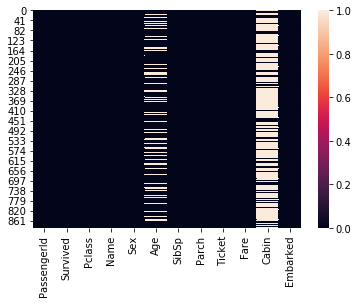

In [78]:
sns.heatmap(df.isnull())

In [79]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85efda3240>]],
      dtype=object)

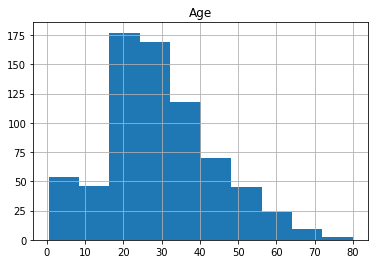

In [80]:
df.hist('Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85f00c9be0>]],
      dtype=object)

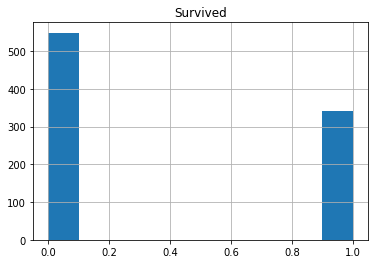

In [81]:
df.hist('Survived')

In [82]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [83]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

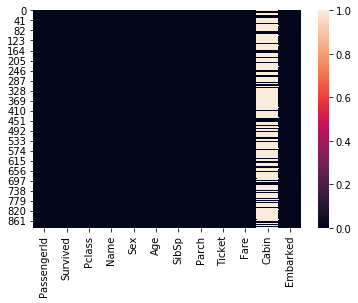

In [84]:
sns.heatmap(df.isnull())

In [85]:
df = df[['Pclass','Sex','SibSp','Parch','Fare','Embarked']]

In [86]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S


In [87]:
df = pd.get_dummies(df)
df.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,0,0
2,3,0,0,7.9250,1,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1
4,3,0,0,8.0500,0,1,0,0,1


In [88]:
x_train = df.values

In [97]:
x_train.dtype

dtype('float64')

In [89]:
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [103]:
X_test = np.array([[3.0,1.0,0.0,7.250,0.0,1.0,0.0,0.0,1.0]])

In [99]:
type(X_test)

numpy.ndarray

In [100]:
X_test.shape

(1, 8)

In [101]:
X_test.dtype

dtype('float64')

In [104]:
y_pred = model.predict(X_test)

In [107]:
y_pred

array([0])

In [108]:
confusion_matrix(X_test,y_pred)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [109]:
accuracy_score(X_test,y_pred)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [ ]:
#Pclass SibSp Parch Fare Sex_female Sex_male Embarked_C Embarked_Q Embarked_S
Sex_female = 0
Sex_male = 0
print('Enter passenger class:(0,1,2)')
Pclass = float(input())
print('Enter Siblings count:')
SibSp = float(input())
print('Enter Parent or child:')
Parch = float(input())
print('Enter Fare:')
Fare = float(input())
print('Enter Gender:')
gender = float(input())
if gender == 'male':
    Sex_male = 1
    Sex_female = 0
else:
    Sex_male = 1
    Sex_female = 0
    

In [110]:
online_test = np.array([[Pclass, SibSp, Parch, Fare, Sex_female, Sex_male, Embarked_C, Embarked_Q, Embarked_S]])
online_test

NameError: name 'Pclass' is not defined

In [ ]:
online_pred = model.predict(online_test)
if online_pred[0] == 1:
    print('Servived')
else:
    print('Not Servived')